<a href="https://colab.research.google.com/github/Samata1695/Netflix-movies-and-TV-shows-clustering/blob/main/netflix_recommendation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question**


This dataset consists of tv shows and movies available on Netflix as of 2019.The dataset is collected from the Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.



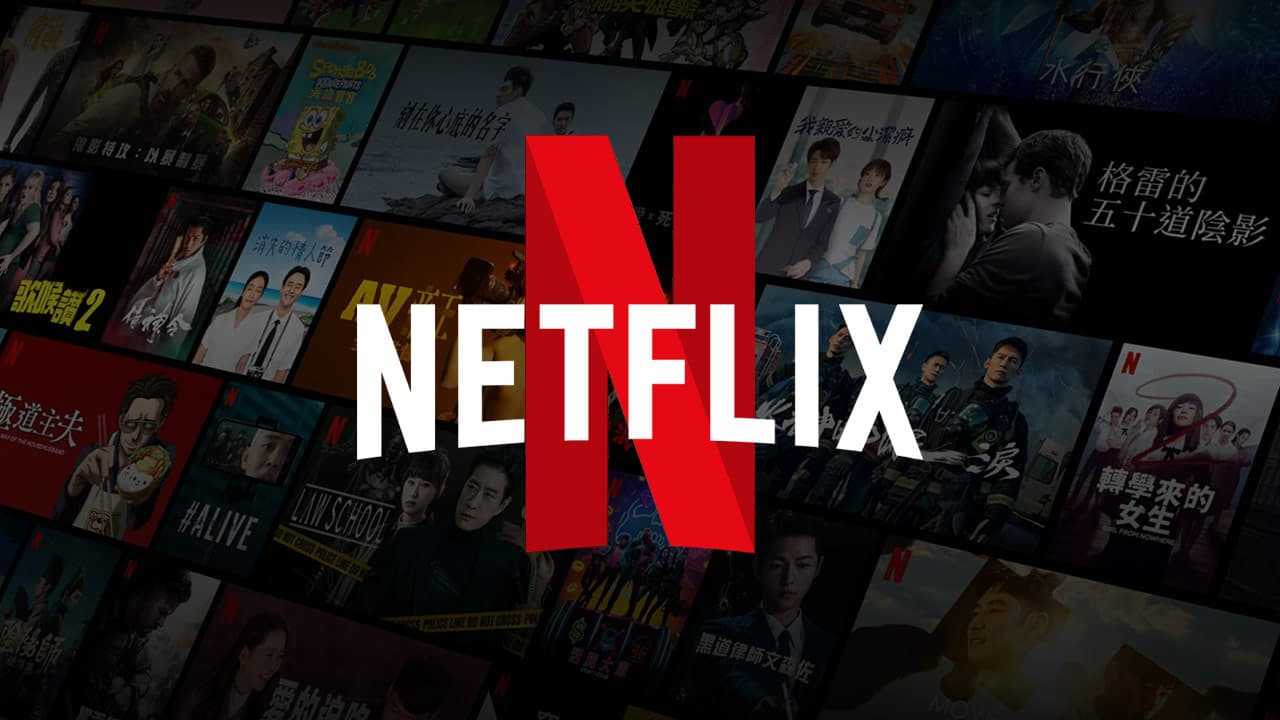

#<b>Answer:

1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focusing on TV rather than movies in
recent years.
4. Clustering similar content by matching text-based features

**Importing Required Libraries:**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

**Loading dataset**

In [ ]:
in_data = pd.read_csv('netflix.csv')

**Display the FIRST 5 Observations**

In [ ]:
print('First 5 Observation')
in_data.head()

First 5 Observation


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102,23
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017.0,11.0,16.0,Teens,3,89,43
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,drama,brilliant group student becom cardcount expert...,2020.0,1.0,1.0,Teens,1,99,5


**Display the LAST 5 Observations**

In [ ]:
print('Last 5 Observation')
in_data.tail()

Last 5 Observation


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,drama intern movi,lebanon civil war depriv zozo famili hes left ...,2020.0,10.0,19.0,Adults,2,91,17
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,drama intern movi music music,scrappi poor boy worm way tycoon dysfunct fami...,2019.0,3.0,2.0,Teens,3,75,29
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44,documentari intern movi music music,documentari south african rapper nasti c hit s...,2020.0,9.0,25.0,Adults,3,96,35
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1,intern tv show realiti tv,dessert wizard adriano zumbo look next “willi ...,2020.0,10.0,31.0,Older Kids,2,105,25
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,No cast,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90,documentari music music,documentari delv mystiqu behind bluesrock trio...,2020.0,3.0,1.0,Adults,2,88,23


In [ ]:
in_data.shape

(7780, 18)

In [ ]:
in_data.columns


Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des', 'Length_lis'],
      dtype='object')

There are 18 columns



In [ ]:
in_data.info

<bound method DataFrame.info of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  

In [ ]:
in_data[in_data.duplicated()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis


There are no duplicated values

In [ ]:
in_data.isnull().sum()

show_id            0
type               0
title              0
cast               0
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added        10
month_added       10
day_added         10
target_ages        0
no_of_category     0
Length_des         0
Length_lis         0
dtype: int64

In [ ]:
in_data.isnull().sum().sum()

40

There are 40 null values present in the data. 10 null values are from date_added column. 

**Removing the rows that contains NULL values.**

In [ ]:
in_data.dropna(subset=['rating'],inplace=True)

**Handling null values**

In [ ]:
in_data['cast'].fillna(value='No cast', inplace=True)
in_data['country'].fillna(value=in_data['country'].mode()[0],inplace=True)



**Convert into date time format**

In [ ]:
in_data["date_added"]=pd.to_datetime(in_data["date_added"])
in_data['year_added']=in_data['date_added'].dt.year
in_data['month_added']=in_data['date_added'].dt.month
in_data['day_added']=in_data['date_added'].dt.day
in_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7780 entries, 0 to 7786
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         7780 non-null   object        
 1   type            7780 non-null   category      
 2   title           7780 non-null   object        
 3   cast            7780 non-null   object        
 4   country         7780 non-null   object        
 5   date_added      7770 non-null   datetime64[ns]
 6   release_year    7780 non-null   int64         
 7   rating          7780 non-null   object        
 8   duration        7780 non-null   int64         
 9   listed_in       7780 non-null   object        
 10  description     7780 non-null   object        
 11  year_added      7770 non-null   float64       
 12  month_added     7770 non-null   float64       
 13  day_added       7770 non-null   float64       
 14  target_ages     7780 non-null   category      
 15  no_o

**Assigning the Ratings into grouped categories**

In [ ]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
in_data['target_ages'] = in_data['rating'].replace(ratings)

**Type should be a category**

In [ ]:
in_data['type'] = pd.Categorical(in_data['type'])

# target_ages is another category (4 classes)
in_data['target_ages'] = pd.Categorical(in_data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102,23
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,2017.0,11.0,16.0,Teens,3,89,43
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,drama,brilliant group student becom cardcount expert...,2020.0,1.0,1.0,Teens,1,99,5


#<b> Exploratory Data Analysis (EDA)

<b>1) Which one is most preferred TV shows or Movies to watch?

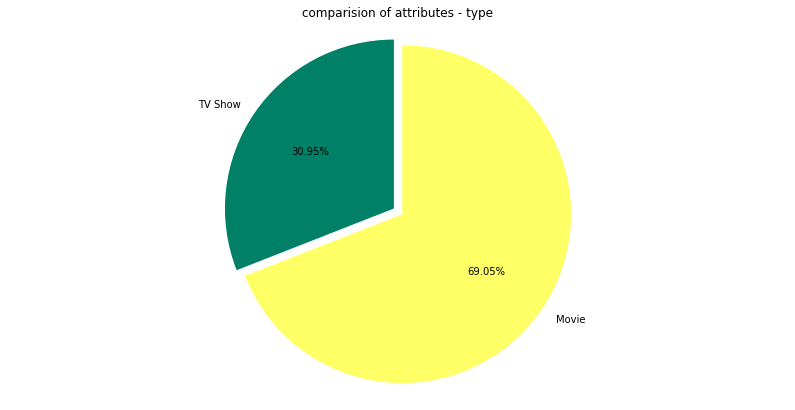

In [ ]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
colors = plt.cm.summer(np.linspace(0, 1, 2))
plt.pie(in_data['type'].value_counts().sort_values(),labels=labels,colors= colors, explode=[0.02,0.04],
        autopct='%1.2f%%', startangle=90)
plt.title('comparision of attributes - type')
plt.axis('equal')
plt.show()

It is clearly visible from above pie-chart that people used to watch movies more than TV shows.Around 69.05% people used to watch movies and 30.95% people used to watch TV shows.

<b>2) Which type of the show(movies or TV shows) got highest ratings?

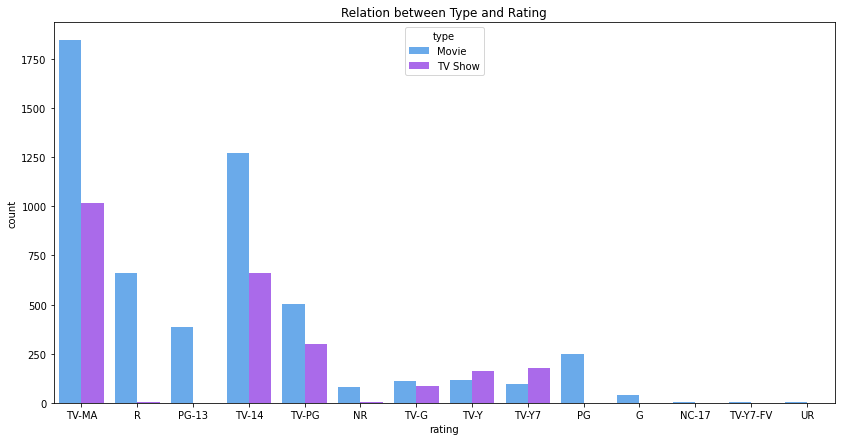

In [ ]:
#Type with Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=in_data, palette='cool')
plt.title('Relation between Type and Rating')
plt.show()

From the above graph, Movies and TV shows highest ratings given by matured audience only(TV-MA). In that particualrly movies got highest ratings as compared to TV shows.

<b> 3) which month most of the movies got released?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


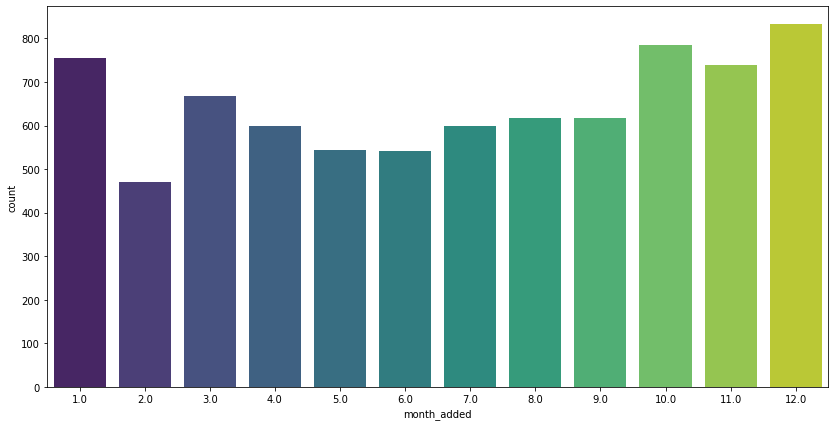

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot('month_added',data= in_data , palette='viridis')

From the above graph,more than 800 movies got released in the month of December and in the month of february the number of movies got released is less.

In [ ]:
#convert string to integer
in_data['duration']=in_data['duration'].str.replace('Season','')
in_data['duration']=in_data['duration'].str.replace('s','')
in_data['duration']=in_data['duration'].str.replace('min','')

in_data['duration']=in_data['duration'].astype(str).astype(int)
in_data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7780, dtype: int64

<b> 4) Analysis Of the duration of movie

In [ ]:
netflix_shows=in_data[in_data['type']=='TV Show']
netflix_movies=in_data[in_data['type']=='Movie']

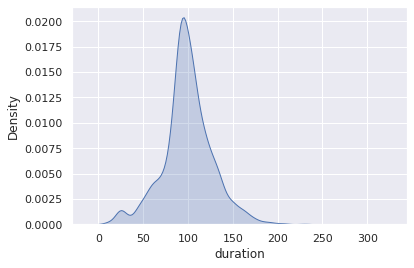

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

Most of the movies are having a duration of 75-120 minutes. This is by taking fact into account that people can easily watch 3 hours movies.

<b> 5) Analysis Of the No. of seasons of TV Shows

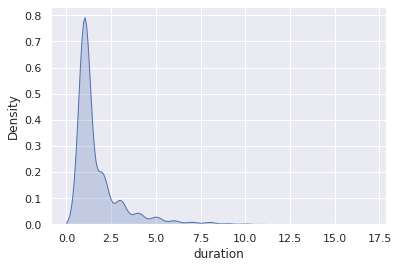

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_shows['duration'], shade=True)

The most of the tv shows comes up with 2 seasons and only few tv shows comes with more than 2 seasons based on audience respose.

<b> 5) Which country people used to watch more TV shows and movies?

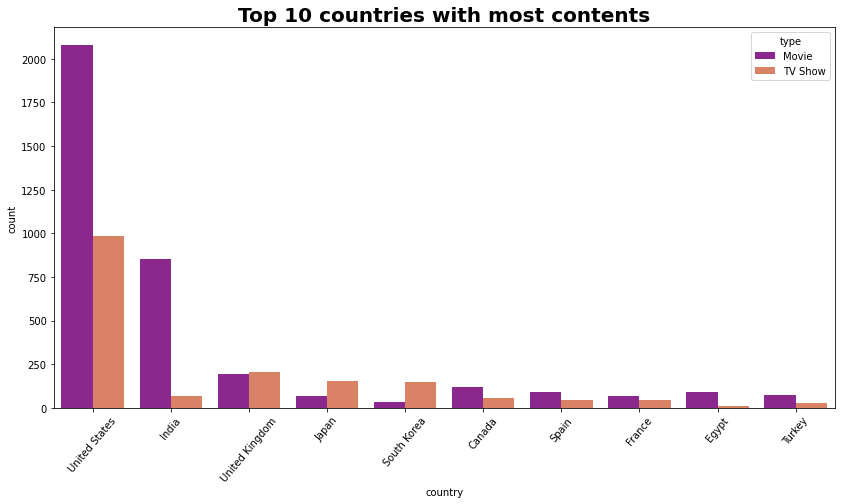

In [ ]:
#Analysing top10 countries with most content 
plt.figure(figsize=(14,7))
sns.countplot(x=in_data['country'],palette="plasma",order=in_data['country'].value_counts().index[0:10],hue=in_data['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=20, fontweight='bold')
plt.show()

United state people used to watch more movies and TV shows as compared to other countries and more precisely they used to watch more movies than the TV shows.

<b> 6) Top 10 Genre of Movies

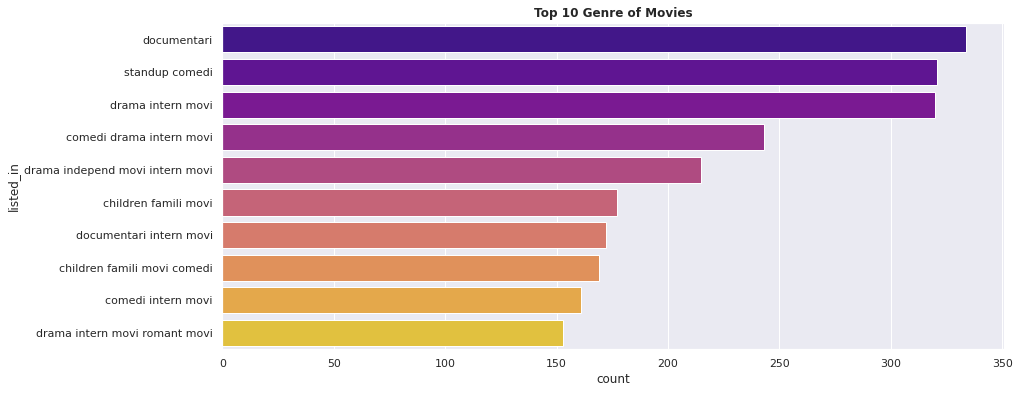

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top 10 Genre of Movies',fontweight="bold")
sns.countplot(y=netflix_movies['listed_in'],data=netflix_movies,order=netflix_movies['listed_in'].value_counts().index[0:10],palette="plasma")

Documentaries are the top most genre in netflix followed by standup comedy and drams and international movies.

<b> 6) Top 10 Genre of TV shows

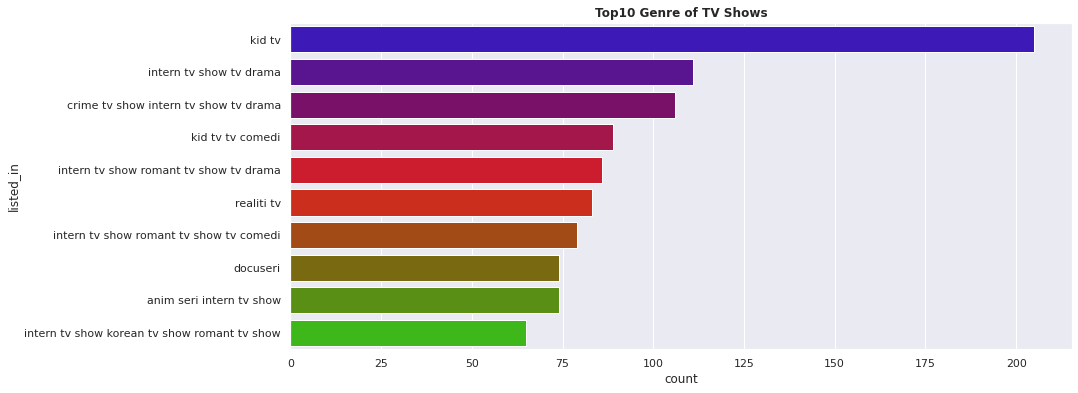

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=netflix_shows['listed_in'],data=netflix_shows,order=netflix_shows['listed_in'].value_counts().index[0:10],palette="brg")

Kids tv show is the top most tv show genre in netflix.

<b>Returns the number of unique values for each column

In [ ]:
in_data.listed_in.nunique()

492

In [ ]:
#value counts
in_data.listed_in.value_counts().to_frame().T

,documentari,standup comedi,drama intern movi,comedi drama intern movi,drama independ movi intern movi,kid tv,children famili movi,documentari intern movi,children famili movi comedi,comedi intern movi,...,action adventur intern movi thriller,anim seri tv horror tv thriller,anim seri crime tv show tv thriller,action adventur faith spiritu scifi fantasi,tv drama tv scifi fantasi teen tv show,crime tv show romant tv show spanishlanguag tv show,crime tv show intern tv show realiti tv,intern movi romant movi scifi fantasi,standup comedi talk show tv mysteri tv scifi fantasi,intern tv show spanishlanguag tv show standup comedi talk show
listed_in,334,321,320,243,215,205,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des', 'Length_lis'],
      dtype='object')

<b>making categories

In [ ]:
categories = ", ".join(in_data['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [ ]:
len(categories)

17062

In [ ]:
len(set(categories))

42

In [ ]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [ ]:
category_wise_count

{'Science & Nature TV': 85,
 'TV Comedies': 524,
 "Kids' TV": 413,
 'Romantic TV Shows': 333,
 'Comedies': 1471,
 'Classic Movies': 103,
 'Documentaries': 786,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Sci-Fi & Fantasy': 76,
 'Dramas': 2105,
 'Sci-Fi & Fantasy': 218,
 'TV Horror': 69,
 'Reality TV': 222,
 'TV Shows': 12,
 'Spanish-Language TV Shows': 147,
 'British TV Shows': 232,
 'Action & Adventure': 721,
 'TV Action & Adventure': 150,
 'TV Dramas': 704,
 'TV Thrillers': 50,
 'Romantic Movies': 531,
 'Faith & Spirituality': 57,
 'Sports Movies': 196,
 'Anime Series': 147,
 'Stand-Up Comedy': 329,
 'TV Mysteries': 90,
 'Crime TV Shows': 427,
 'Movies': 52,
 'Independent Movies': 673,
 'Thrillers': 491,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'Teen TV Shows': 60,
 'LGBTQ Movies': 90,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Children & Family Movies': 532,
 'International TV Shows': 1198,
 'Classic & Cult TV': 27,
 'Docuseries': 353,
 'Anime Features': 57,
 '

<b>Sorting category wise count by value

In [ ]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 27),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

<b>Top 10 most occurred category.

In [ ]:
top_10_most_occurred_categories = sorted_category_wise_count[-10:]
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 704),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [ ]:
#datatype
type(in_data.listed_in.iloc[0])

str

In [ ]:
(in_data.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
(in_data.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [ ]:
len((in_data.listed_in.iloc[0]).split(","))

3

In [ ]:
no_of_category = []
for categories in in_data.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)
#creating new column
in_data['no_of_category'] = no_of_category
in_data.no_of_category.unique()

array([3, 2, 1])

In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category'],
      dtype='object')

In [ ]:
in_data.description.iloc[0]



'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
First_des = in_data.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
#download nltk
import nltk 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

<b>Removing punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
in_data['description'] = in_data['description'].apply(remove_punctuation)
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,14.0,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,23.0,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018.0,12.0,20.0,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017.0,11.0,16.0,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,2020.0,1.0,1.0,Teens,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b> Extracting the stopwords from nltk library

In [ ]:
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [ ]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


<b> Removing stopwords

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
in_data['description'] = in_data['description'].apply( remove_stopwords )
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020.0,8.0,14.0,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016.0,12.0,23.0,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018.0,12.0,20.0,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017.0,11.0,16.0,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,2020.0,1.0,1.0,Teens,1


<b> It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text

In [ ]:

count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(in_data['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('future', 7157), ('elite', 5643), ('inhabit', 8948), ('island', 9224), ('paradise', 12675), ('far', 6399), ('crowded', 4231), ('slums', 16094), ('get', 7353), ('one', 12303), ('chance', 3059), ('join', 9442), ('saved', 15197), ('squalor', 16509), ('devastating', 4826), ('earthquake', 5492), ('hits', 8309), ('mexico', 11104), ('city', 3325), ('trapped', 17911), ('survivors', 17057), ('walks', 18869), ('life', 10171), ('wait', 18846), ('rescued', 14514), ('trying', 18053), ('desperately', 4779), ('stay', 16618), ('alive', 781), ('army', 1222), ('recruit', 14234), ('found', 6940), ('dead', 4493), ('fellow', 6527), ('soldiers', 16219), ('forced', 6876), ('confront', 3780), ('terrifying', 17433), ('secret', 15386), ('thats', 17487), ('haunting', 8014), ('jungle', 9537), ('training', 17868), ('camp', 2750), ('postapocalyptic', 13354), ('world', 19306), ('ragdoll', 13953), ('robots', 14840), ('hide', 8189), ('fear', 6478), ('dangerous', 4420), ('machines', 10531), ('exterminate',

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

<b>Store the count in panadas dataframe with vocab as index

In [ ]:
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

,Word,count
18859,şeref,19599
10390,ōarai,19598
12375,łukasz,19597
11099,überelite,19596


In [ ]:
vocab_before_stemming.head(20).T

,18859,10390,12375,11099,11670,13287,6583,18197,10428,9864,19561,6535,19596,16416,7190,18399,19586,19593,10293,18074
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19599,19598,19597,19596,19595,19594,19593,19592,19591,19590,19589,19588,19587,19586,19585,19584,19583,19582,19581,19580


<b> Create an object of stemming function

In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#Stemming for description
in_data['description'] = in_data['description'].apply( Apply_stemming )
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017.0,11.0,16.0,Teens,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020.0,1.0,1.0,Teens,1


In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(in_data['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
# Creating new dataframe vocab_after_stemming
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
#Adding a new column length which contains length of description
in_data['Length_des'] = in_data['description'].apply(lambda x: len(x))

In [ ]:
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102


In [ ]:
in_data.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [ ]:
len(in_data.description.iloc[0])

82

In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des'],
      dtype='object')

In [ ]:
# listed_in remove punctuation
in_data['listed_in'] = in_data['listed_in'].apply(remove_punctuation)
in_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,2017.0,11.0,16.0,Teens,3,89
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group student becom cardcount expert...,2020.0,1.0,1.0,Teens,1,99


In [ ]:
#Remove stopwords for listed_in
in_data['listed_in'] = in_data['listed_in'].apply( remove_stopwords )
in_data.head( 2 )

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88


In [ ]:
#Using CountVectorizer() to count vocabulary items
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(in_data['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
#Stemming for description
in_data['listed_in'] = in_data['listed_in'].apply( Apply_stemming )
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102


In [ ]:
#TfidfVectorizer (after stemming)
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(in_data['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
#Adding a new column length_lis which will contain length of listed_in
in_data['Length_lis'] = in_data['listed_in'].apply(lambda x: len(x))
in_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,no_of_category,Length_des,Length_lis
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020.0,8.0,14.0,Adults,3,82,40
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016.0,12.0,23.0,Adults,2,88,17
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018.0,12.0,20.0,Adults,2,102,23


In [ ]:
in_data[['description', 'Length_des', 'listed_in' ,'Length_lis' ]].head(3)

,description,Length_des,listed_in,Length_lis
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


In [ ]:
in_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages',
       'no_of_category', 'Length_des', 'Length_lis'],
      dtype='object')

In [ ]:
X_variable = in_data[['no_of_category' ,'Length_des','Length_lis']]
stdscaler = preprocessing.StandardScaler()

In [ ]:
X_variable.describe()

,no_of_category,Length_des,Length_lis
count,7780.000000,7780.000000,7780.000000
mean,2.193059,93.013753,24.341388
std,0.785852,10.772499,10.682503
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


#**Silhouette Score:**

In [ ]:
X_rescale=stdscaler.fit_transform(X_variable)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42825796837628916
For n_clusters = 3, silhouette score is 0.3833520787206349
For n_clusters = 4, silhouette score is 0.3741693410239206
For n_clusters = 5, silhouette score is 0.37231199044896185
For n_clusters = 6, silhouette score is 0.368313461337545
For n_clusters = 7, silhouette score is 0.37612100716600544
For n_clusters = 8, silhouette score is 0.3707371779038129
For n_clusters = 9, silhouette score is 0.3739594082838373
For n_clusters = 10, silhouette score is 0.36380386549819393
For n_clusters = 11, silhouette score is 0.3574724107042723
For n_clusters = 12, silhouette score is 0.3551720194767436
For n_clusters = 13, silhouette score is 0.3495373777158981
For n_clusters = 14, silhouette score is 0.33351420795857323
For n_clusters = 15, silhouette score is 0.3394731099905706


# **For 15 clusters the silhouette score is evaluated and now lets see which clusters are optimal through visualization.**

In [ ]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
2,4,0.374
7,9,0.374
3,5,0.372
6,8,0.371
4,6,0.368
8,10,0.364
9,11,0.357


For n_clusters = 2 The average silhouette_score is : 0.42825796837628916
For n_clusters = 3 The average silhouette_score is : 0.3833520787206349
For n_clusters = 4 The average silhouette_score is : 0.3741693410239206
For n_clusters = 5 The average silhouette_score is : 0.3723012285667011
For n_clusters = 6 The average silhouette_score is : 0.3677313705784462
For n_clusters = 7 The average silhouette_score is : 0.3608345107441907
For n_clusters = 8 The average silhouette_score is : 0.3708904863509021
For n_clusters = 9 The average silhouette_score is : 0.3748805348881804
For n_clusters = 10 The average silhouette_score is : 0.36465359346536674
For n_clusters = 11 The average silhouette_score is : 0.35653282198410946
For n_clusters = 12 The average silhouette_score is : 0.35650143907303045
For n_clusters = 13 The average silhouette_score is : 0.3483368174906935
For n_clusters = 14 The average silhouette_score is : 0.3435806657043623
For n_clusters = 15 The average silhouette_score is : 0

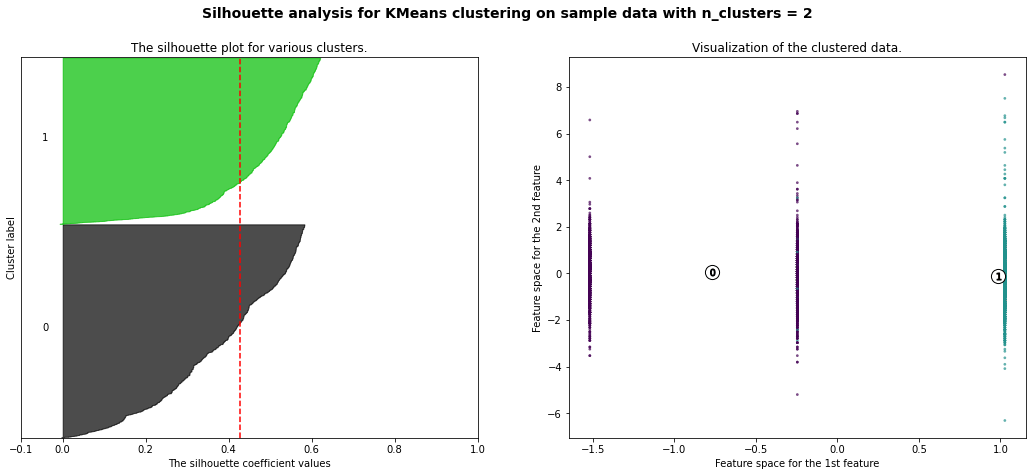

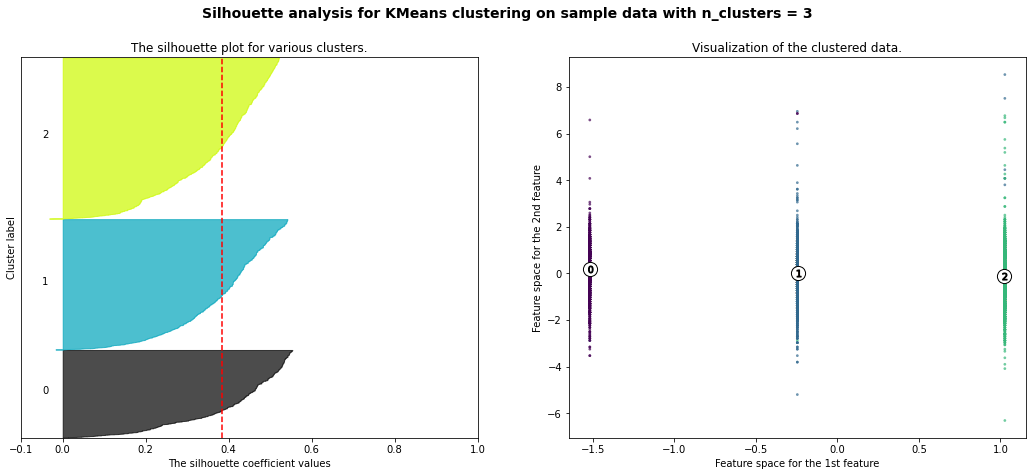

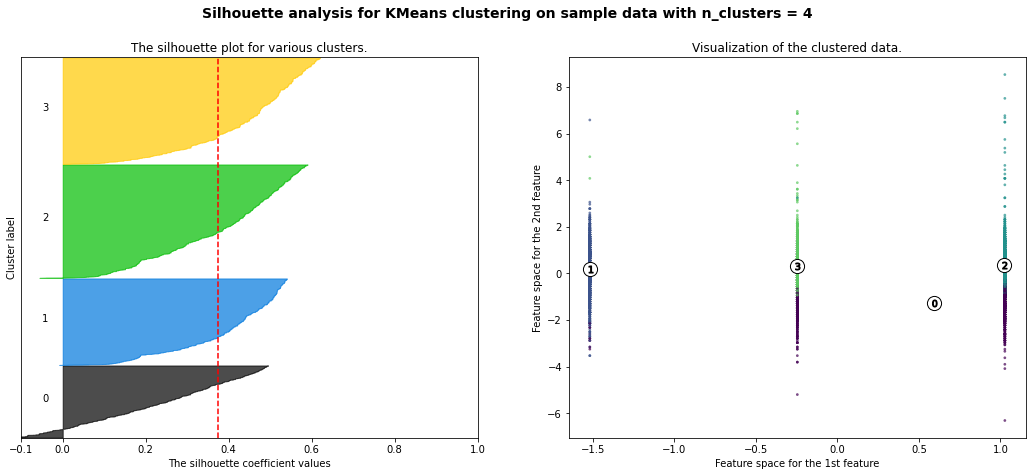

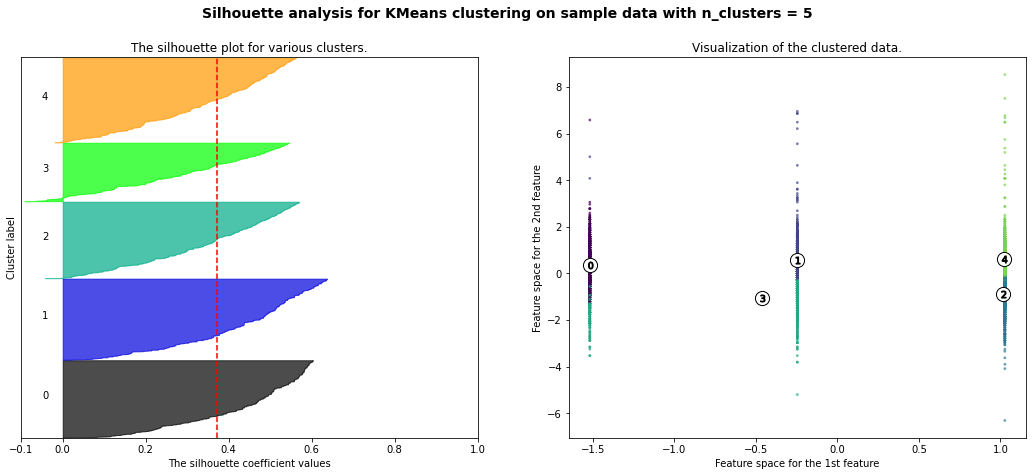

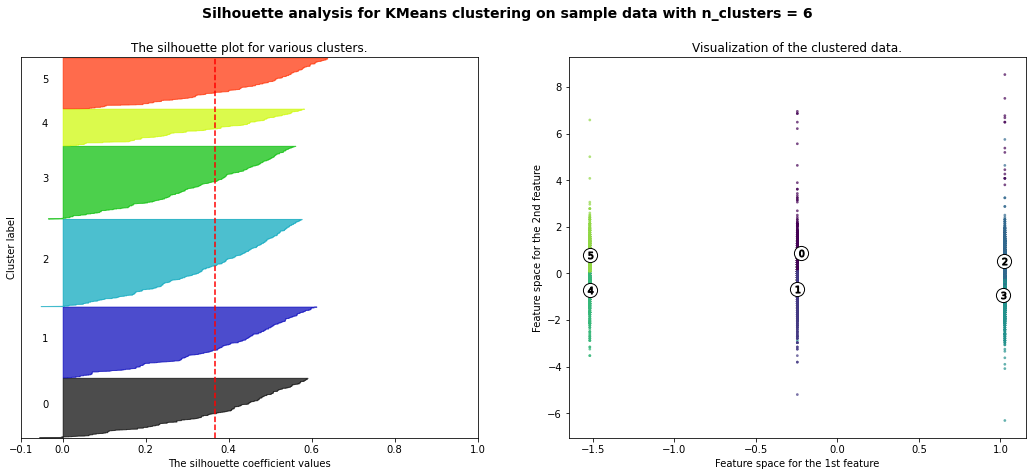

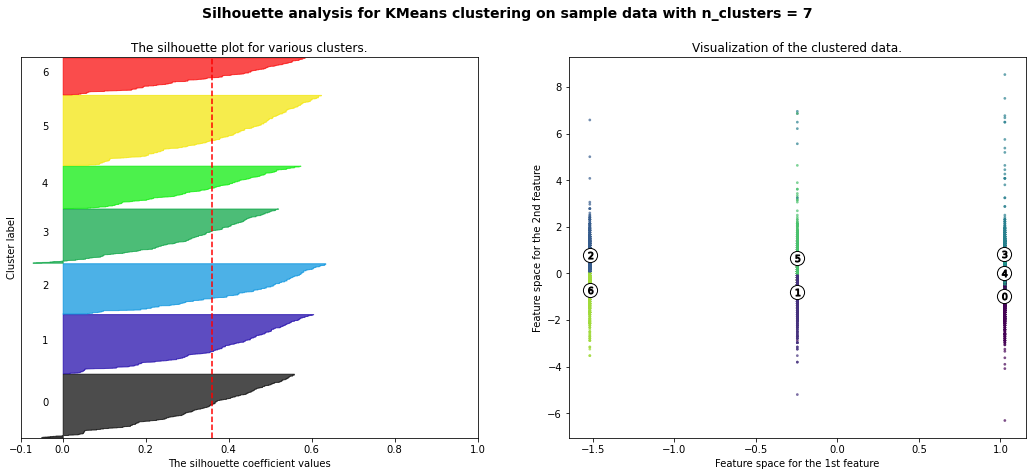

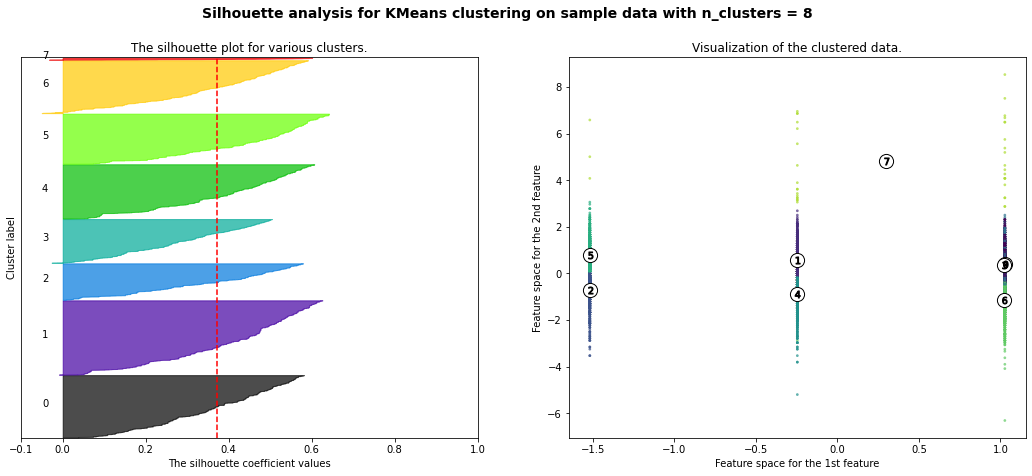

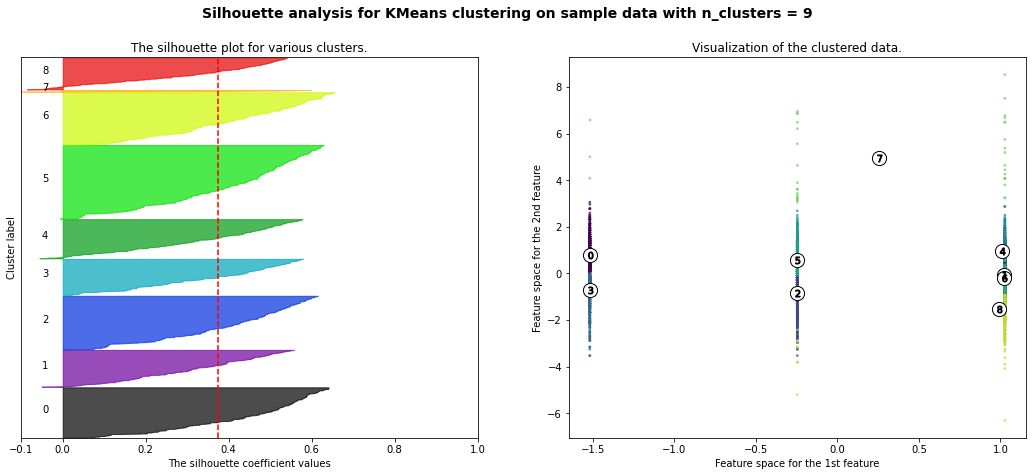

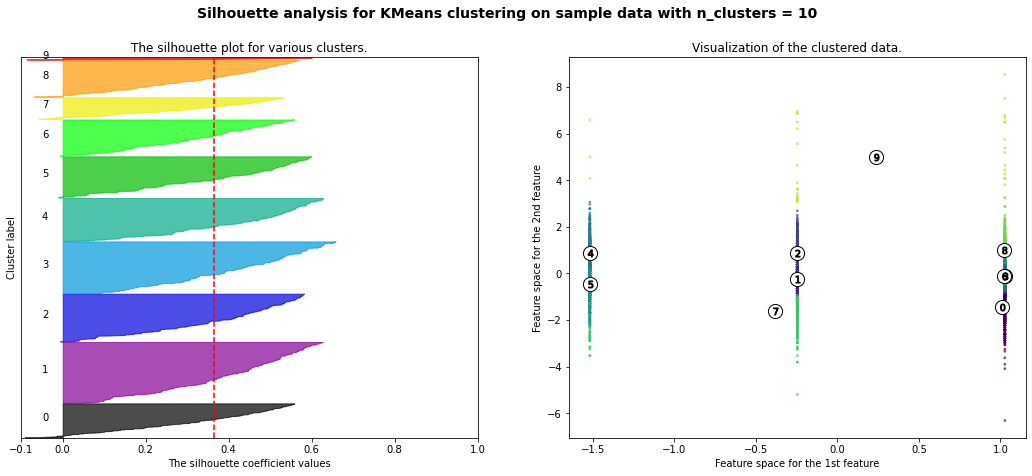

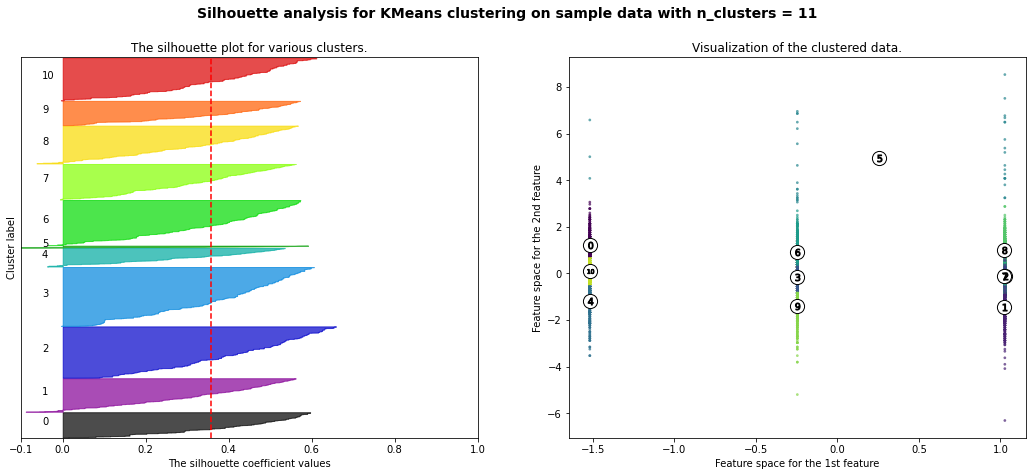

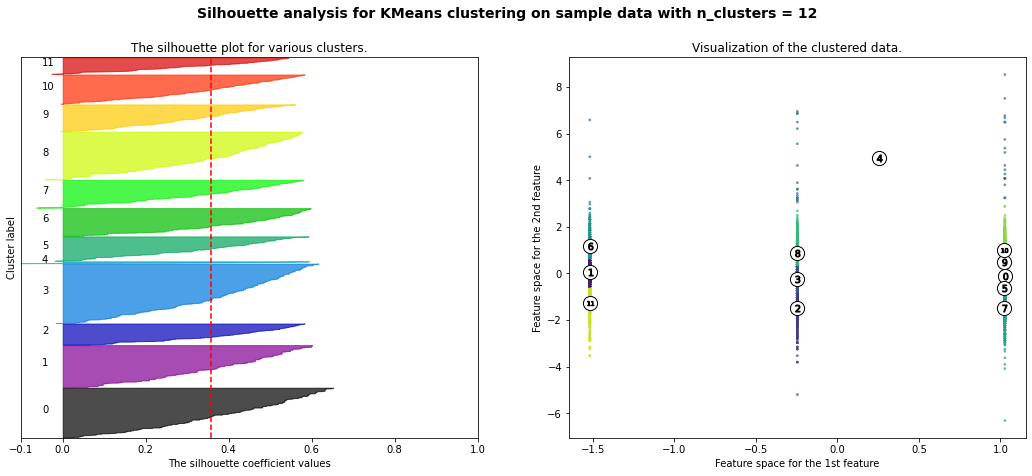

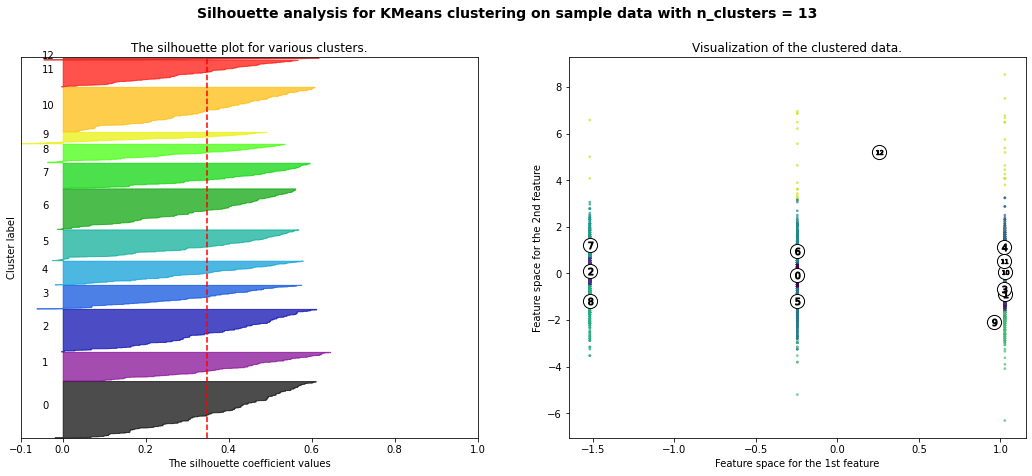

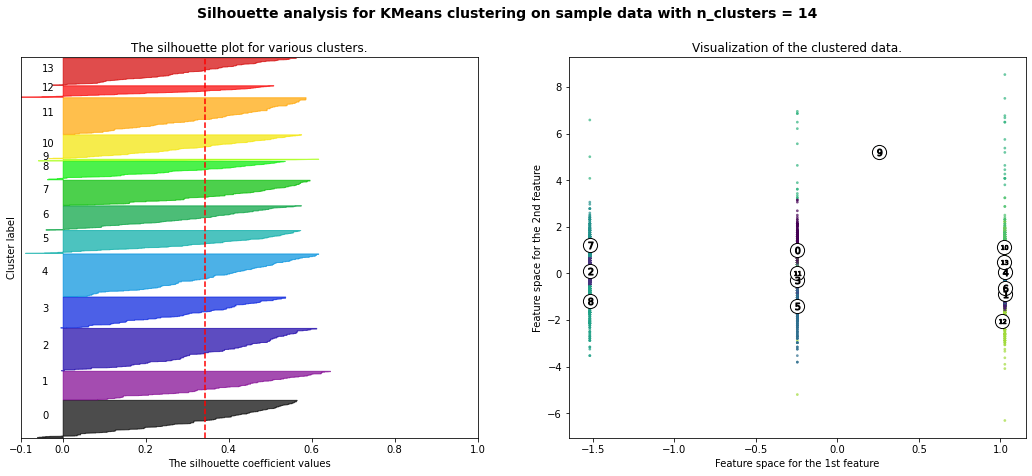

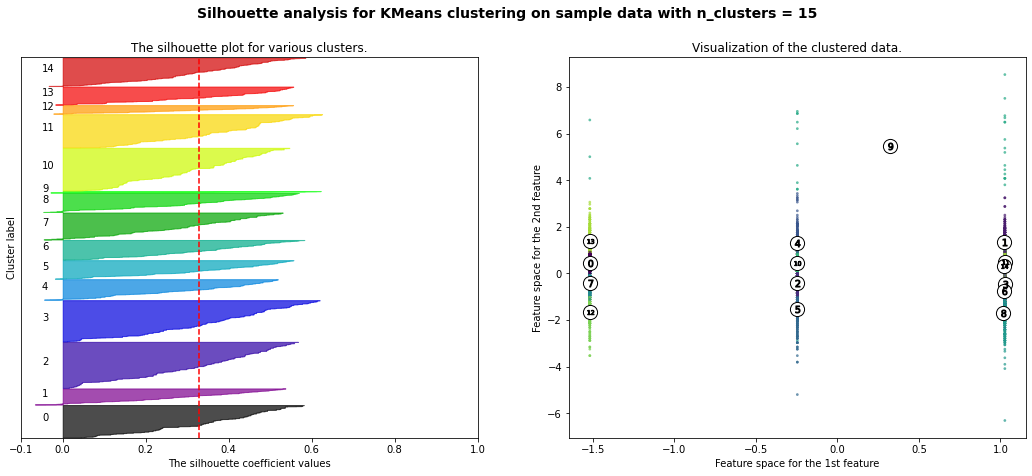

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
  
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

   
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

       
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
     
     
    colors = cm.viridis(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
   
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

**Elbow Method:**This method is used to determine the optimal value of K. Joining point on the elbow curve is the optimum point.

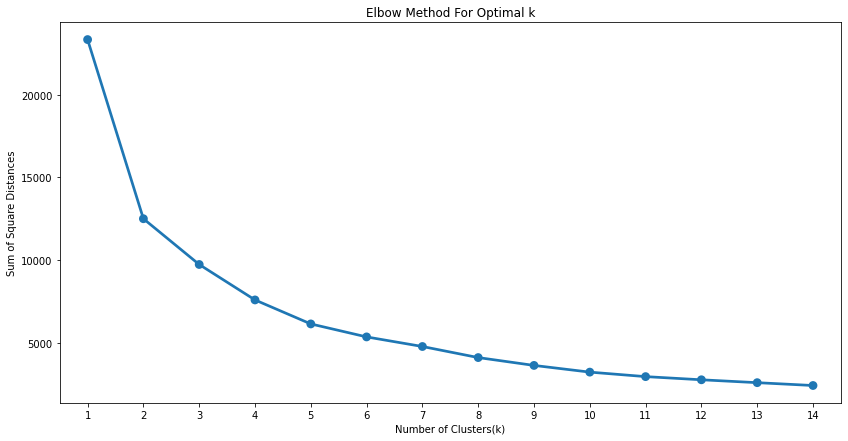

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(14 , 7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the above elbow graph K=2 and K=3 are considered as optimum points.**

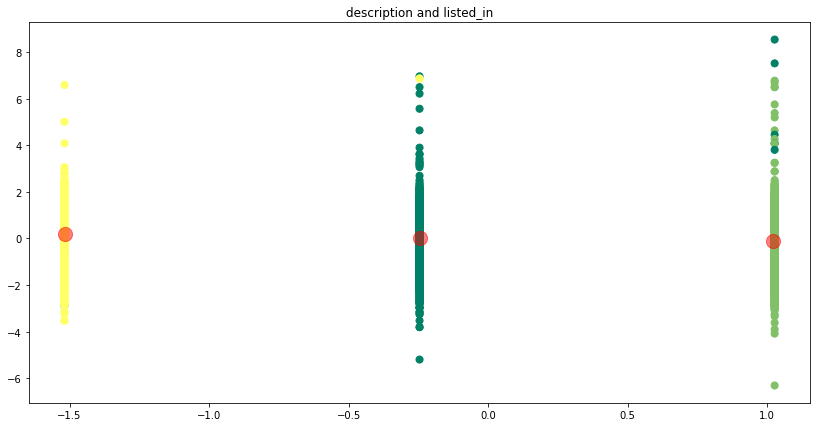

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize=(14 , 7))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='summer')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#**DBSCAN**

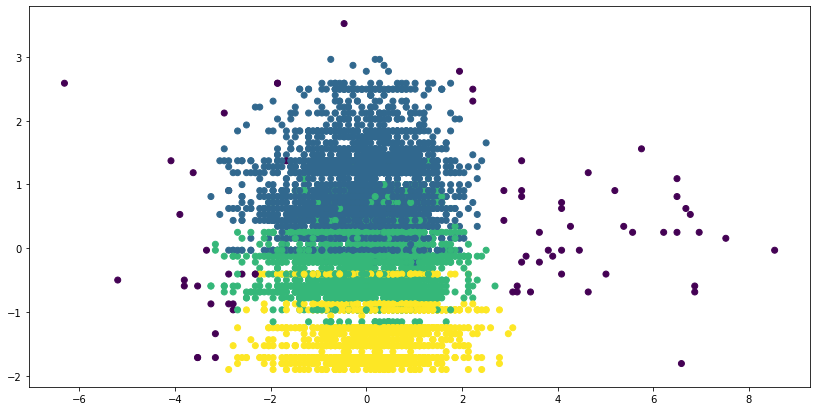

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 14 , 7 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

DBSCAN used to separate the areas of high density with the areas of low density shown above.

# **Dendrogram**

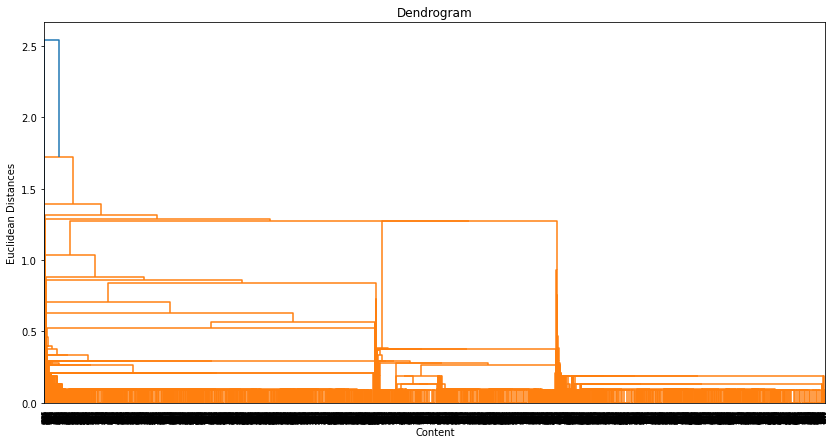

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # Lets find largest vertical distance we can make without crossing any other horizontal lin

Dendrogram is a tree like structure used to know the optimal point. At K=1 we got the optimal point.

#**Let's import AgglomerativeClustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# **Visualizing the clusters (three dimensions only)**


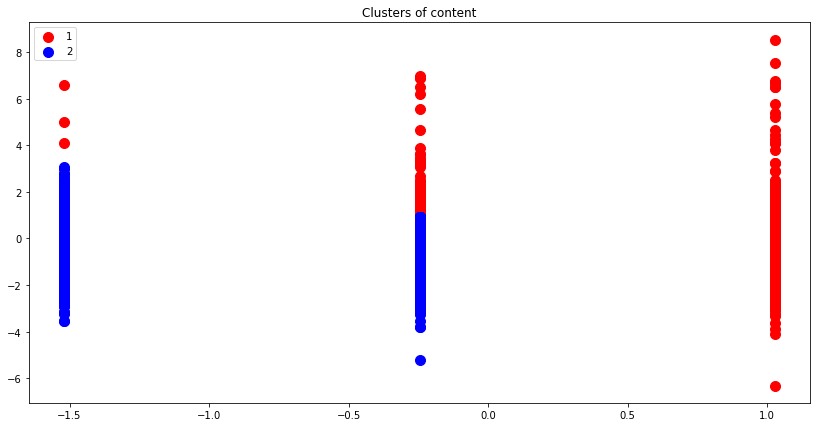

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')


plt.title('Clusters of content')

plt.legend()
plt.show()

#**Conclusion:**

1) With the help of Silhoutte score, optimality test is performed for 15 clusters and we obtained K=2 as a optimal point with the help of elbow method. K means is the best algorithm for identification than hierarchical as the evaluation metrics also indicates the same.

2) DBSCAN used to show the areas of high density are separated by the areas of low density. Because of this the clusters are found in any arbitrary shape.

3) Netflix has 5372 movies and 2938 tv shows, there are more movies on netflix than tv shows. Around 69% used to watch the movies and 31% people used to watch the tv shows.

4) Movies and tv shows highest ratings given by metured audience only(TV-MA).In that particularly movies got highest ratings than tv shows.

5) More than 800 movies got released in the month of December and in the month of february the number of movies got released less.

6) Most of the movies are having a duration of 75-120 minutes. This is by taking a fact into an account that peple can easily watch 3 hours of movie and most of the tv shows comes up with two seasons and only few comes up with more than 2 seasons based on audience response.

7) United state people used to watch more movies and tv shows as compared to other countries and more precisely they used to watch more movies than tv shows.

8) Documentaries are the top most genre in netflix which is followed by stand up comedy and dramas and international movies.

9) Kids tv show is the top most genre netflix.


